In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.bmp', 0)
def imshow(img):
    plt.imshow(img, cmap='Greys_r',vmin = 0, vmax = 255)
    plt.show()

print(img.shape)

(512, 512)


In [2]:
# (a) Generate noisy images with gaussian noise
def gen_gaussianNoise(img, u, sig, amp):
    img = img + amp * np.random.normal(u, sig, img.shape)
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] > 255:
                img[i][j] = 255
            elif img[i][j] < 0:
                img[i][j] = 0
    return img + amp * np.random.normal(u, sig, img.shape)

In [3]:
#(b) Generate noisy images with salt-and-pepper noise
def gen_saltAndPepperNoise(img, u, sig, threshold):
    salt_img = img.copy()
    a = np.random.uniform(0, 1, img.shape)
    for i in range(len(img)):
        for j in range(len(img[0])):
            if a[i][j] < threshold:
                salt_img[i][j] = 0
            elif a[i][j] > 1-threshold:
                salt_img[i][j] = 255
            
    return salt_img

In [4]:
#(c) box filter
def box_filter(img, size):
    img_padding = np.zeros(( len(img)+ size - 1, len(img[0]) + size - 1), dtype = np.int)
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_padding[i+size//2][j+size//2] = img[i][j]
    img_boxFilter = img.copy()
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_boxFilter[i][j] = np.mean(img_padding[i:i+size, j:j+size])
    return img_boxFilter

In [5]:
#(d)median filter
def median_filter(img, size):
    img_padding = np.zeros(( len(img)+ size - 1, len(img[0]) + size - 1), dtype = np.int)
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_padding[i+size//2][j+size//2] = img[i][j]
    img_medianFilter = img.copy()
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_medianFilter[i][j] = np.median(img_padding[i:i+size, j:j+size])
    return img_medianFilter

In [6]:
#(e)opening-then-closing and closing-then opening filter
from HW5 import *
kernel = np.ones((5,5), np.uint8) 
kernel[0][0] = kernel[0][4] = kernel[4][0] = kernel[4][4] = 0

In [7]:
img_GaussianNoise_10 = gen_gaussianNoise(img, 0, 1, 10)
img_GaussianNoise_30 = gen_gaussianNoise(img, 0, 1, 30)
img_SaltAndPepper_01 = gen_saltAndPepperNoise(img, 0, 1, 0.1)
img_SaltAndPepper_005 = gen_saltAndPepperNoise(img, 0, 1, 0.05)

In [8]:
#(c) box filter on (a)(b)
boxfilter_G10_3x3 = box_filter(img_GaussianNoise_10, 3)
boxfilter_G30_3x3 = box_filter(img_GaussianNoise_30, 3)
boxfilter_G10_5x5 = box_filter(img_GaussianNoise_10, 5)
boxfilter_G30_5x5 = box_filter(img_GaussianNoise_30, 5)
boxfilter_SAP005_3x3 = box_filter(img_SaltAndPepper_005, 3)
boxfilter_SAP01_3x3 = box_filter(img_SaltAndPepper_01, 3)
boxfilter_SAP005_5x5 = box_filter(img_SaltAndPepper_005, 5)
boxfilter_SAP01_5x5 = box_filter(img_SaltAndPepper_01, 5)

In [9]:
#(d)median filter on (a)(b)
median_filter_G10_3x3 = median_filter(img_GaussianNoise_10, 3)
median_filter_G30_3x3 = median_filter(img_GaussianNoise_30, 3)
median_filter_G10_5x5 = median_filter(img_GaussianNoise_10, 5)
median_filter_G30_5x5 = median_filter(img_GaussianNoise_30, 5)
median_filter_SAP005_3x3 = median_filter(img_SaltAndPepper_005, 3)
median_filter_SAP01_3x3 = median_filter(img_SaltAndPepper_01, 3)
median_filter_SAP005_5x5 = median_filter(img_SaltAndPepper_005, 5)
median_filter_SAP01_5x5 = median_filter(img_SaltAndPepper_01, 5)

In [10]:
#(e)opening-then-closing and closing-then opening filter on (a)(b)
oc_G10 = closing(opening(img_GaussianNoise_10, kernel), kernel)
oc_G30 = closing(opening(img_GaussianNoise_30, kernel), kernel)
oc_SAP005 = closing(opening(img_SaltAndPepper_005, kernel), kernel)
oc_SAP01 = closing(opening(img_SaltAndPepper_01, kernel), kernel)
co_G10 = opening(closing(img_GaussianNoise_10, kernel), kernel)
co_G30 = opening(closing(img_GaussianNoise_30, kernel), kernel)
co_SAP005 = opening(closing(img_SaltAndPepper_005, kernel), kernel)
co_SAP01 = opening(closing(img_SaltAndPepper_01, kernel), kernel)

In [11]:
# conculate SNR for each picture
#normalize pixel from 0~255 to 0~1
def normalize(img):
    imax = 0
    imin = 255
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] > imax:
                imax = img[i][j]
            if img[i][j] < imin:
                imin = img[i][j]

    normal_img = np.zeros(img.shape)
    #normal_img[i][j] = (img[i][j])/(255)
    #why not
    #normal_img[i][j] = (img[i][j] - imin)/(imax - imin)
    #WTF
    for i in range(len(img)):
        for j in range(len(img[0])):
            normal_img[i][j] = (img[i][j])/(255)
    return normal_img
import math
# SNR function
def getSNR(signal_img, noise_img):
    Vs = Us = Vn = Un = 0
    for i in range(signal_img.shape[0]):
        for j in range(signal_img.shape[1]):
            Us += signal_img[i][j]
            Un += noise_img[i][j] - signal_img[i][j]
    Us = Us/(signal_img.shape[0]*signal_img.shape[1])
    Un = Un/(noise_img.shape[0]*noise_img.shape[1])    
    for i in range(signal_img.shape[0]):
        for j in range(signal_img.shape[1]):
            Vs += math.pow(signal_img[i][j] - Us, 2)
            Vn += math.pow(noise_img[i][j] - signal_img[i][j] - Un, 2)
    Vs = math.pow(Vs/(signal_img.shape[0]*signal_img.shape[1]), 0.5)
    Vn = math.pow(Vn/(noise_img.shape[0]*noise_img.shape[1]), 0.5 )   
    return 20*math.log10(Vs/Vn)

In [12]:
# test if getSNR corrected
median_5x5 = cv2.imread('median_5x5.bmp', 0)
img = cv2.imread('lena.bmp', 0)
nor_img = normalize(img)
print(getSNR(nor_img, normalize(median_5x5)))

15.673697071703499


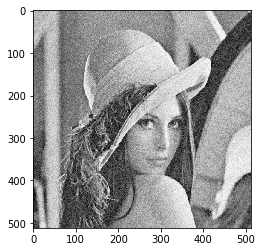

img_GaussianNoise_10 SNR: 10.582159616486045


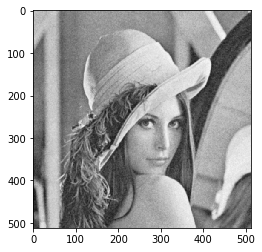

boxfilter_G10_3x3 SNR: 15.554186972527429


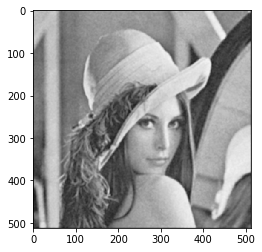

boxfilter_G10_5x5 SNR: 13.422398446812128


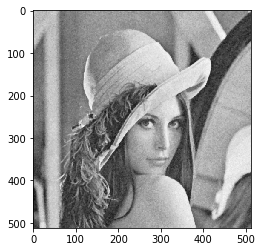

median_filter_G10_3x3 SNR: 15.871028776344156


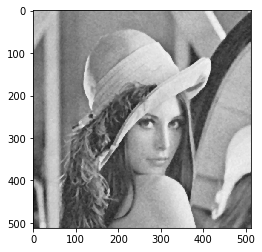

median_filter_G10_5x5 SNR: 15.202067497138092


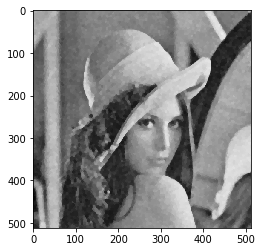

oc_G10 SNR: 12.869013087216084


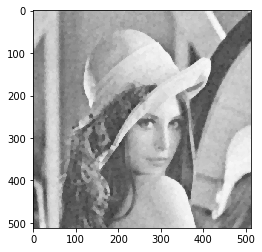

co_G10 SNR: 13.102026914070791


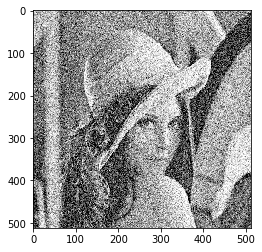

img_GaussianNoise_30 SNR: 1.1060348709648216


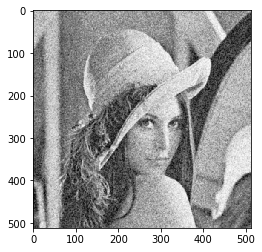

boxfilter_G30_3x3 SNR: 9.840695431928022


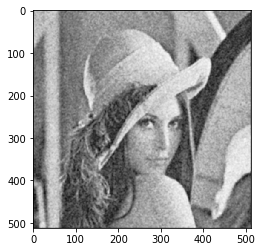

boxfilter_G30_5x5 SNR: 11.364750313463405


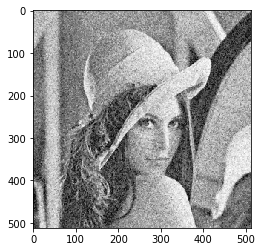

median_filter_G30_3x3 SNR: 8.361866565208482


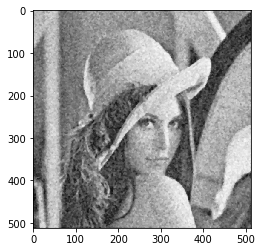

median_filter_G30_5x5 SNR: 10.762178575489623


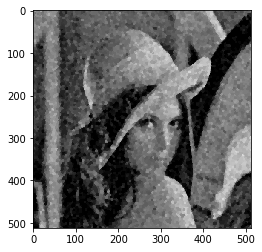

oc_G30 SNR: 9.868676183602243


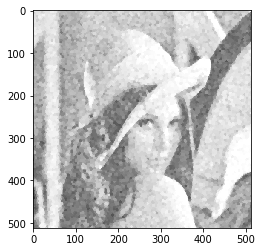

co_G30 SNR: 9.74582246847833


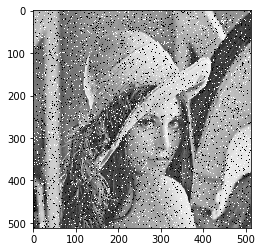

img_SaltAndPepper_005 SNR: 0.960553723260913


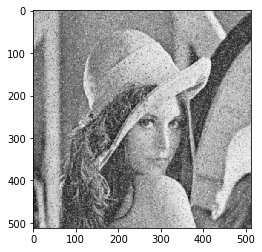

boxfilter_SAP005_3x3 SNR: 9.270761054781431


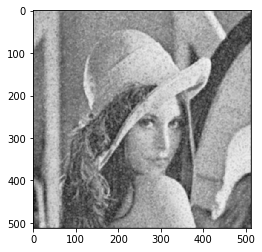

boxfilter_SAP005_5x5 SNR: 10.585229977328034


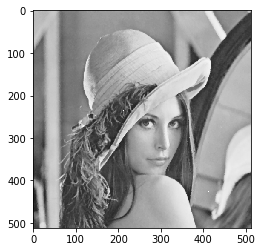

median_filter_SAP005_3x3 SNR: 18.39199774664265


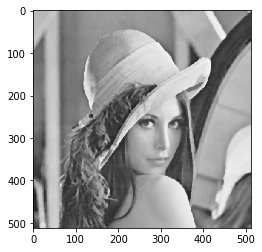

median_filter_SAP005_5x5 SNR: 15.84474482628908


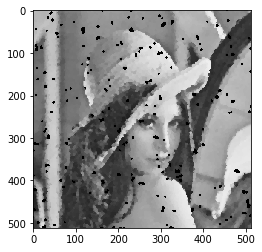

oc_SAP005 SNR: 5.632387268088957


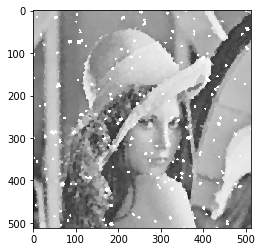

co_SAP005 SNR: 5.2533349222179755


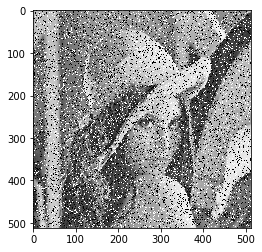

img_SaltAndPepper_01 SNR: -2.1134794115489886


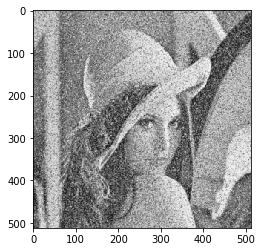

boxfilter_SAP01_3x3 SNR: 6.197246757663493


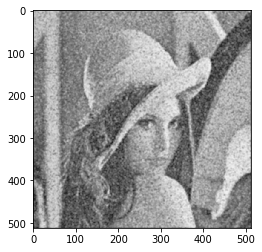

boxfilter_SAP01_5x5 SNR: 8.149349218041323


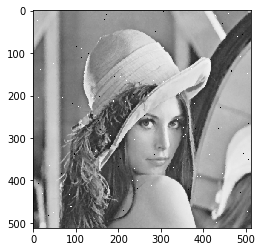

median_filter_SAP01_3x3 SNR: 14.115781635953052


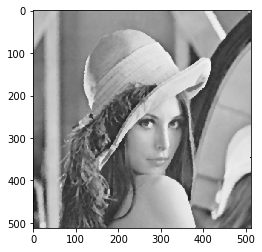

median_filter_SAP01_5x5 SNR: 14.241946802558584


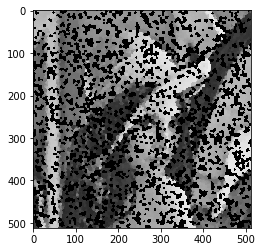

oc_SAP01 SNR: -2.0318200503358743


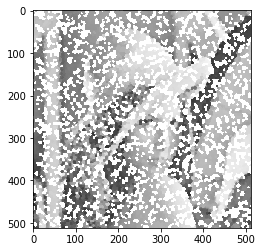

co_SAP01 SNR: -2.533524998007206


In [15]:
dict = {}

dict['img_GaussianNoise_10'] = img_GaussianNoise_10
dict['boxfilter_G10_3x3'] = boxfilter_G10_3x3
dict['boxfilter_G10_5x5'] = boxfilter_G10_5x5
dict['median_filter_G10_3x3'] = median_filter_G10_3x3
dict['median_filter_G10_5x5'] = median_filter_G10_5x5
dict['oc_G10'] = oc_G10 
dict['co_G10'] = co_G10 

dict['img_GaussianNoise_30'] = img_GaussianNoise_30
dict['boxfilter_G30_3x3'] = boxfilter_G30_3x3
dict['boxfilter_G30_5x5'] = boxfilter_G30_5x5
dict['median_filter_G30_3x3'] = median_filter_G30_3x3
dict['median_filter_G30_5x5'] = median_filter_G30_5x5
dict['oc_G30'] = oc_G30
dict['co_G30'] = co_G30

dict['img_SaltAndPepper_005'] = img_SaltAndPepper_005
dict['boxfilter_SAP005_3x3'] = boxfilter_SAP005_3x3
dict['boxfilter_SAP005_5x5'] = boxfilter_SAP005_5x5
dict['median_filter_SAP005_3x3'] = median_filter_SAP005_3x3
dict['median_filter_SAP005_5x5'] = median_filter_SAP005_5x5
dict['oc_SAP005'] = oc_SAP005
dict['co_SAP005'] = co_SAP005

dict['img_SaltAndPepper_01'] = img_SaltAndPepper_01
dict['boxfilter_SAP01_3x3'] = boxfilter_SAP01_3x3
dict['boxfilter_SAP01_5x5'] = boxfilter_SAP01_5x5
dict['median_filter_SAP01_3x3'] = median_filter_SAP01_3x3
dict['median_filter_SAP01_5x5'] = median_filter_SAP01_5x5
dict['oc_SAP01'] = oc_SAP01
dict['co_SAP01'] = co_SAP01
for i in dict:
    imshow(dict[i])
    print(i, 'SNR:', getSNR(nor_img, normalize(dict[i])))
    cv2.imwrite(i + ".bmp", dict[i])